# Daffa Asyqar Ahmad Khalisheka

# 1103200034

# Machine Learning Class

# Telkom University

# Data Mobil Bekas dari Situs Web

Dataset ini berisi informasi tentang mobil bekas. Data ini dapat digunakan untuk banyak tujuan, seperti prediksi harga untuk menjelaskan penggunaan regresi linear dalam Machine Learning.

**Impor *Library***

*Library* numpy digunakan untuk memproses larik atau array.

*Library* matplotlib digunakan membuat visualisasi data dalam dua dimensi.

*Library* seaborn dibangun di atas *library* matplotlib, digunakan untuk membuat visualisasi data.

*Library* pandas digunakan untuk menganalisis dan memanipulasi data.

In [1]:
# Import library yang diperlukan
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

# Import modul untuk pemisahan data, penskalaan, pengukuran kinerja, dan model machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.impute import SimpleImputer
from sklearn.ensemble import HistGradientBoostingRegressor


# DATA UNDERSTANDING DAN DATA PREPARATION

**Memuat Dataset (Data Loading)**

Memuat dataset dengan nama file 'car data.csv' dengan format file csv (comma separated value)

In [8]:
cars = pd.read_csv('car data.csv')

**Menampilkan Dataframe**

In [9]:
cars

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


Data yang diberikan adalah dalam bentuk tabel yang memiliki 301 baris (data) dan 9 kolom (atribut). Setiap baris mewakili entri atau informasi mengenai mobil yang dijual, sementara setiap kolom adalah atribut atau variabel yang mendefinisikan karakteristik mobil tersebut. Berikut adalah penjelasan singkat mengenai masing-masing atribut:

1. Car_Name: Nama mobil.
2. Year: Tahun pembuatan mobil.
3. Selling_Price: Harga jual mobil.
4. Present_Price: Harga mobil saat ini (nilai sekarang).
5. Kms_Driven: Jumlah kilometer yang telah ditempuh oleh mobil.
6. Fuel_Type: Jenis bahan bakar yang digunakan oleh mobil (misalnya, Petrol atau Diesel).
7. Seller_Type: Tipe penjual (misalnya, Dealer atau Individual).
8. Transmission: Jenis transmisi mobil (misalnya, Manual atau Automatic).
9. Owner: Jumlah pemilik sebelumnya (misalnya, 0 jika hanya satu pemilik sebelumnya).

Data ini dapat digunakan untuk menganalisis dan memodelkan faktor-faktor yang memengaruhi harga jual mobil berdasarkan atribut-atribut yang tercantum.

Untuk mendeteksi anomali dalam data, Anda perlu melakukan analisis eksplorasi data terlebih dahulu. Ada beberapa langkah yang dapat Anda lakukan untuk mengidentifikasi anomali dalam data mobil yang Anda impor ke dalam DataFrame cars menggunakan Pandas di Python:

Tinjau Data Awal: Pertama-tama, Anda perlu melihat beberapa baris pertama dan terakhir dari data untuk mendapatkan gambaran awal tentang isinya. Ini dapat dilakukan dengan perintah head() dan tail().

In [10]:
cars.head()
cars.tail()


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


Statistik Deskriptif: Gunakan perintah describe() untuk mendapatkan ringkasan statistik tentang data, seperti rata-rata, deviasi standar, quartil, dan nilai maksimum dan minimum.

In [11]:
cars.describe()


,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [13]:
print(cars.columns)


Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')


Grafik: Visualisasi data dalam bentuk grafik dapat membantu Anda melihat pola dan potensi anomali. Gunakan perpustakaan seperti Matplotlib atau Seaborn untuk membuat grafik seperti histogram, scatter plot, atau box plot.

Contoh:

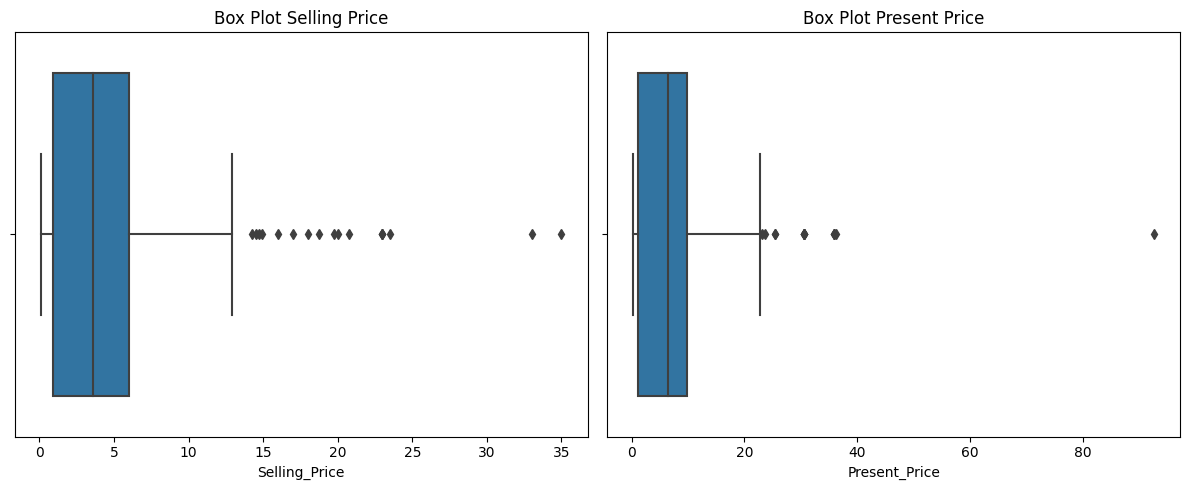

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Membuat subplot dengan 1 baris dan 2 kolom
plt.figure(figsize=(12, 5))

# Subplot 1: Box plot untuk 'Selling_Price'
plt.subplot(1, 2, 1)
sns.boxplot(x='Selling_Price', data=cars)
plt.title('Box Plot Selling Price')

# Subplot 2: Box plot untuk 'Present_Price'
plt.subplot(1, 2, 2)
sns.boxplot(x='Present_Price', data=cars)
plt.title('Box Plot Present Price')

# Menampilkan gambar
plt.tight_layout()
plt.show()


Filter Data: Anda juga dapat menggunakan teknik penyaringan (filtering) untuk menemukan anomali. Misalnya, Anda dapat mencari data yang memiliki nilai di luar rentang tertentu, atau yang tidak sesuai dengan pola yang diharapkan.

In [19]:
anomali = cars[(cars['Present_Price'] > 100000) | (cars['Kms_Driven'] > 200000)]


**Anomali Kualitas Data pada Atribut id**

In [20]:
print(cars.nunique(axis=0))

Car_Name          98
Year              16
Selling_Price    156
Present_Price    147
Kms_Driven       206
Fuel_Type          3
Seller_Type        2
Transmission       2
Owner              3
dtype: int64


Hasil dari `cars.nunique(axis=0)` adalah daftar jumlah nilai unik (anomali kualitas data) pada setiap atribut dalam DataFrame "cars". Mari kita jelaskan hasil ini satu per satu:

1. `Car_Name`: Terdapat 98 nama mobil yang berbeda dalam dataset ini. Ini menunjukkan variasi dalam merek dan model mobil yang berbeda yang termasuk dalam data.

2. `Year`: Terdapat 16 nilai unik dalam kolom tahun ("Year"). Hal ini mengindikasikan bahwa data mencakup mobil-mobil yang diproduksi dalam 16 tahun yang berbeda.

3. `Selling_Price`: Ada 156 nilai unik dalam kolom harga jual ("Selling_Price"). Ini menunjukkan variasi dalam harga jual mobil yang berbeda.

4. `Present_Price`: Terdapat 147 nilai unik dalam kolom harga sekarang ("Present_Price"). Ini menunjukkan variasi dalam harga sekarang mobil yang berbeda.

5. `Kms_Driven`: Ada 206 nilai unik dalam kolom kilometer yang sudah ditempuh ("Kms_Driven"). Hal ini menunjukkan variasi dalam jumlah kilometer yang sudah ditempuh oleh mobil-mobil dalam dataset.

6. `Fuel_Type`: Terdapat 3 nilai unik dalam kolom jenis bahan bakar ("Fuel_Type"). Ini mengindikasikan bahwa mobil-mobil dalam dataset ini menggunakan tiga jenis bahan bakar yang berbeda.

7. `Seller_Type`: Ada 2 nilai unik dalam kolom tipe penjual ("Seller_Type"). Ini menunjukkan ada dua tipe penjual mobil dalam dataset ini.

8. `Transmission`: Terdapat 2 nilai unik dalam kolom jenis transmisi ("Transmission"). Ini mengindikasikan bahwa mobil-mobil dalam dataset ini menggunakan dua jenis transmisi yang berbeda.

9. `Owner`: Ada 3 nilai unik dalam kolom pemilik sebelumnya ("Owner"). Ini menunjukkan bahwa mobil-mobil dalam dataset ini memiliki tiga tingkat kepemilikan sebelumnya yang berbeda.

Jadi, hasil ini memberikan informasi tentang variasi data dalam setiap atribut dan dapat berguna dalam analisis data dan pengambilan keputusan.

**Mengecek Informasi pada Dataset**

In [21]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


Terdapat dua atribut bertipe data float, 3 atribut bertipe data integer, empat atribut bertipe data objetct.

**Melihat Keberadaan Data 'null' *(missing value)* pada Dataset**

In [22]:
cars.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

Tidak ditemukan data yang bernilai null pada tiap-tiap atribut.

**Melihat Deskripsi Statistika Dataset**

In [23]:
cars.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


Dari deskripsi statistik yang Anda berikan, terlihat bahwa sebagian besar variabel memiliki sebaran data yang cukup wajar. Namun, ada beberapa hal yang dapat dianggap sebagai anomali atau perhatian:

1. Selling_Price:
   - Nilai Selling_Price memiliki standar deviasi yang cukup besar, yaitu sekitar 5.08, yang mengindikasikan variasi yang signifikan dalam harga jual mobil. Namun, hal ini mungkin saja wajar tergantung pada jenis mobil yang diwakili dalam dataset.

2. Present_Price:
   - Nilai Present_Price juga memiliki standar deviasi yang besar, yaitu sekitar 8.64, menunjukkan variasi yang besar dalam harga mobil saat ini. Ini bisa jadi wajar tergantung pada tipe mobil yang ada dalam dataset.

3. Kms_Driven:
   - Nilai maksimum Kms_Driven adalah 500,000 km, yang bisa dianggap sebagai nilai yang tinggi tergantung pada jenis mobilnya. Ini bisa menjadi pertimbangan untuk mengklasifikasikan beberapa mobil sebagai anomali, terutama jika sebagian besar mobil lainnya memiliki kilometer yang jauh lebih rendah. Anda mungkin ingin memeriksa apakah ada alasan khusus mengapa beberapa mobil memiliki kilometer yang sangat tinggi.

4. Owner:
   - Nilai maksimum Owner adalah 3, yang menunjukkan bahwa beberapa mobil memiliki tiga pemilik sebelumnya. Ini juga bisa menjadi pertimbangan dalam menganalisis data. Namun, hal ini tidak selalu menjadi anomali, tergantung pada kondisi dan sejarah mobil.

Apakah ini adalah anomali atau tidak tergantung pada konteks dataset dan tujuan analisis Anda. Jika Anda menganggap beberapa data di luar batasan tertentu sebagai anomali, Anda perlu melakukan analisis lebih lanjut untuk menentukan apakah ada masalah dalam data atau apakah data tersebut mewakili situasi nyata. Jika ini adalah data penjualan mobil bekas, variasi dalam harga dan kilometer bisa saja wajar tergantung pada merek dan model mobil yang terlibat.

**Cek Nilai 0 pada Atribut 'Selling_Price' dan 'Present_Price	'**




In [24]:
Selling_Price = (cars.Selling_Price == 0).sum()
Present_Price = (cars.Present_Price == 0).sum()

print("Nilai 0 di kolom Selling Price ada: ", Selling_Price)
print("Nilai 0 di kolom y Present Price: ", Present_Price)

Nilai 0 di kolom Selling Price ada:  0
Nilai 0 di kolom y Present Price:  0


**Cek Ukuran Data Saat Ini**

In [25]:
cars.shape

(301, 9)

**Univariate EDA**

**Analisis Fitur Numerik dengan data fitur tunggal**

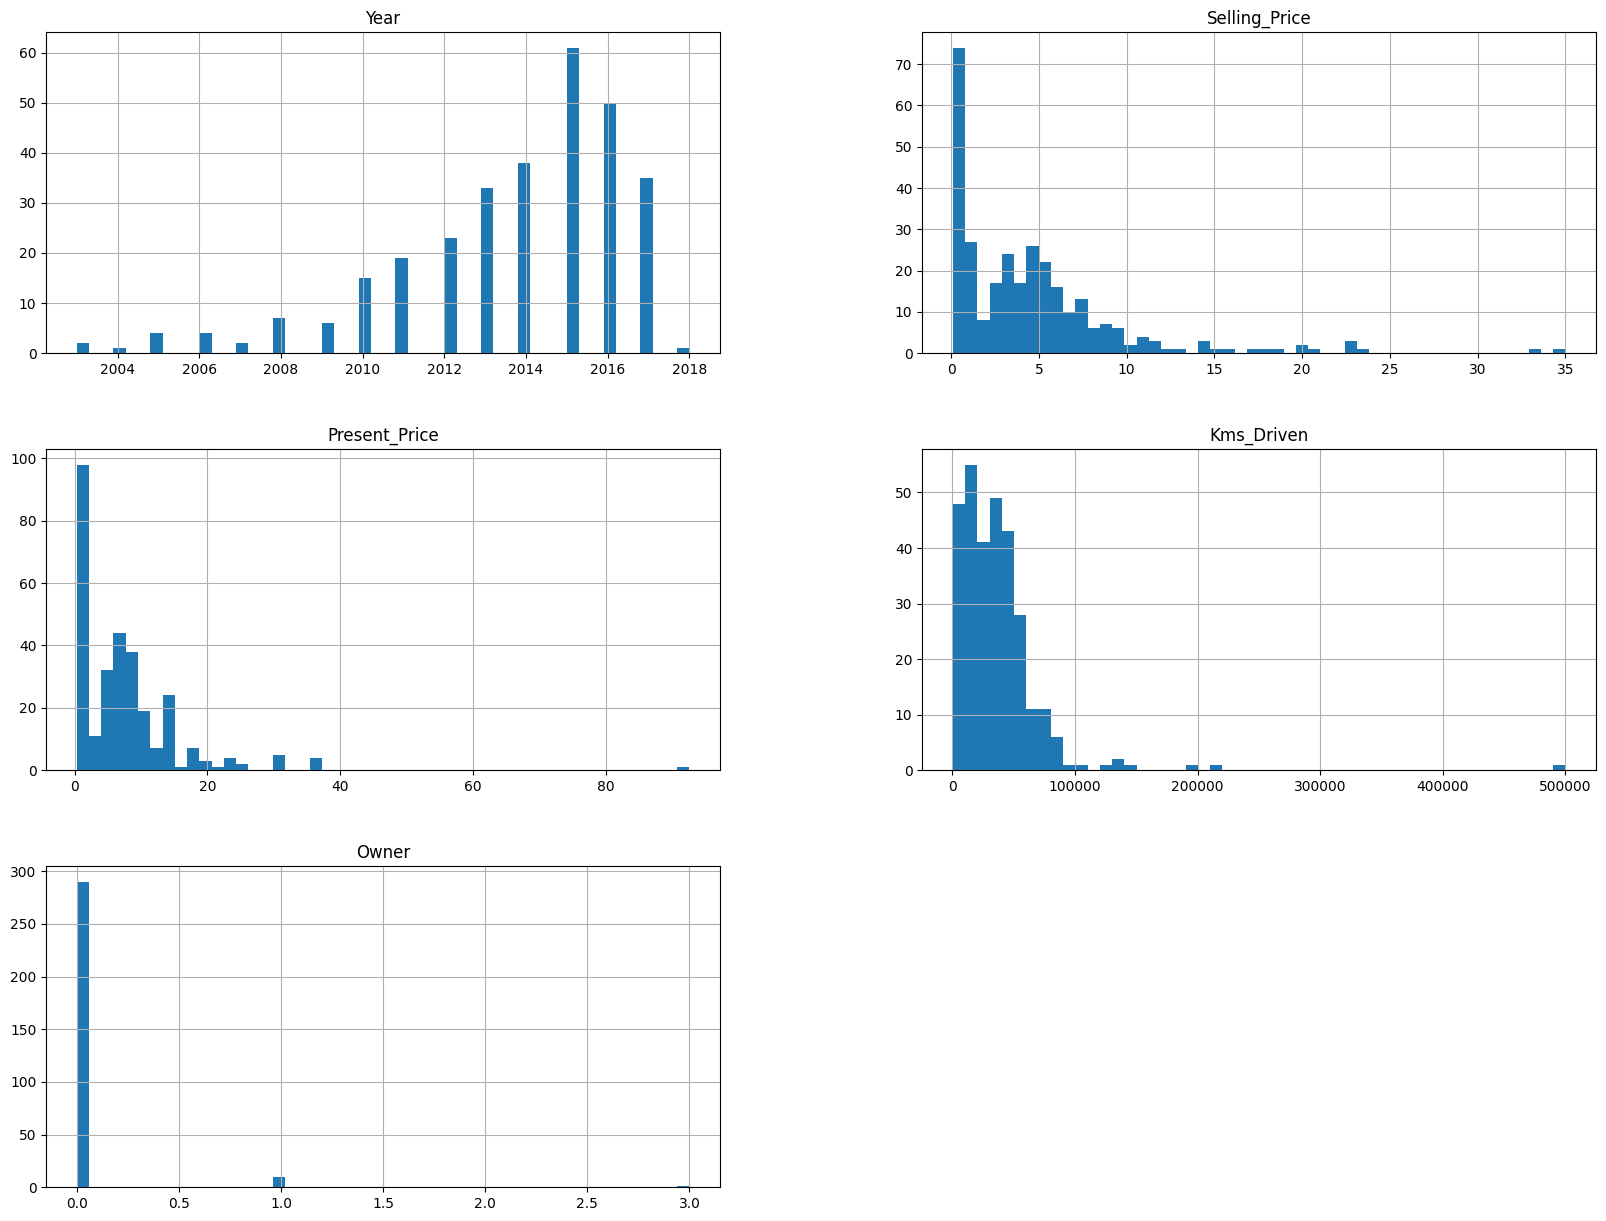

In [26]:
cars.hist(bins=50, figsize=(20,15))
plt.show()

**Multivariate EDA**

**Mengamati Hubungan Antar Fitur Numerik dengan Fungsi 'pairplot()'**

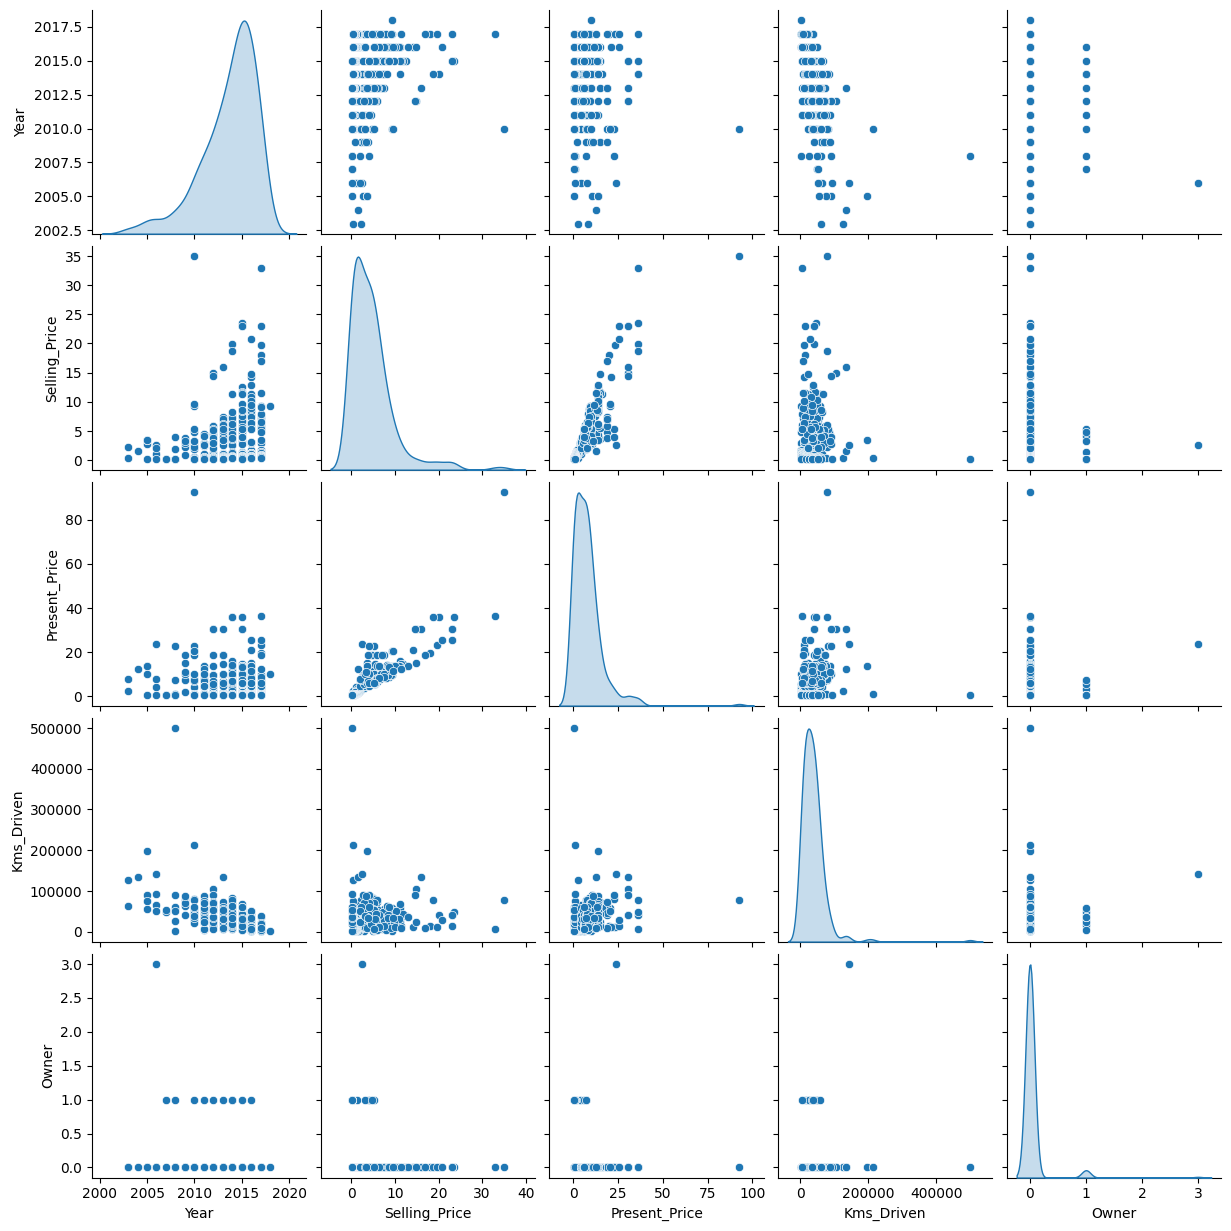

In [27]:
sns.pairplot(cars, diag_kind = 'kde')

**Evaluasai Skor Korelasi dengan Fungsi 'corr()'**

<ipython-input-28-b08ac371d53d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = cars.corr().round(2)


Text(0.5, 1.0, 'Correlation Matrix untuk tiap fitur ')

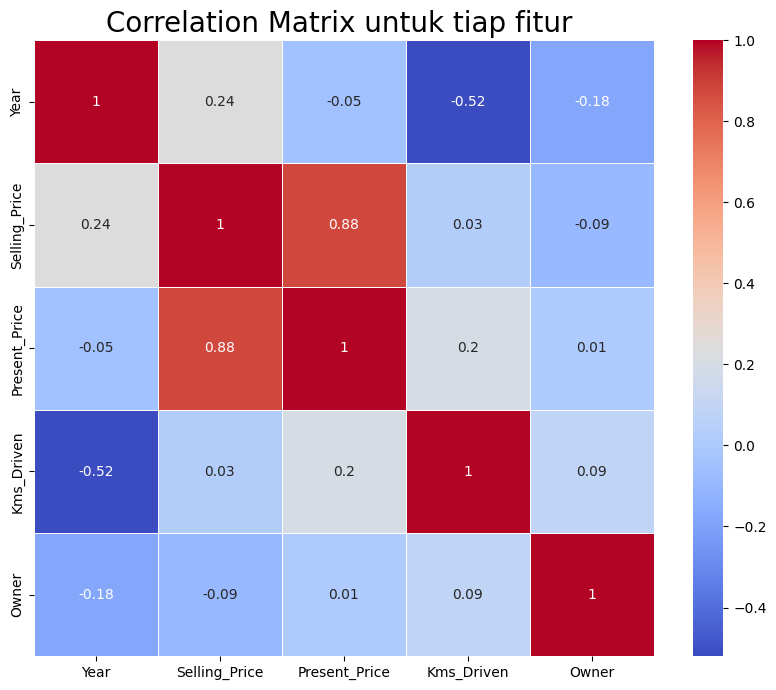

In [28]:
plt.figure(figsize=(10, 8))
correlation_matrix = cars.corr().round(2)

# Parameter 'annot = True', untuk menampilkan nilai dalam persegi
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk tiap fitur ", size=20)

**Inisialisasi atribut dan target**

Menginisialisasikan variabel X yang merupakan fitur-fitur untuk memprediksi harga suatu rumah, dan variabel y yang merupakan fitur target atau nilai yang akan diprediksi. Tidak mengikutsertakan fitur-fitur yang memiliki pengaruh/korelasi lemah dengan fitur 'price'.

In [32]:
X = cars[['Year', 'Selling_Price', 'Kms_Driven']]
y = cars['Present_Price']

**Split Dataset**

Split dataset menjadi data latih dan data uji sebelum transformasi. Hal ini ditujukan supaya transformasi diterapkan hanya pada data latih.

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=123)

**Menampilkan total dataset secara keseluruhan, total dataset latih, total dataset uji.**

In [35]:
print(f'Total # sampel di seluruh dataset: {len(X)}')
print(f'Total # sampel di seluruh dataset: {len(X_train)}')
print(f'Total # sampel di seluruh datasett: {len(X_test)}')

Total # sampel di seluruh dataset: 301
Total # sampel di seluruh dataset: 270
Total # sampel di seluruh datasett: 31


**Normalisasi Data dengan StandardScaler**

Standarisasi fitur dengan cara mengurangi setiap nilai pada kumpulan data dengan nilai rata-rata, kemudian dibagi dengan deviasi standar. Standarisasi ditujukan supaya data tidak memiliki penyimpangan nilai yang besar.

**Standarisasi Data Latih**

In [36]:
numerical_features = ['Year', 'Selling_Price', 'Kms_Driven']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

,Year,Selling_Price,Kms_Driven
127,0.818248,-0.775632,-0.759062
249,0.818248,0.114661,-0.511842
144,0.138473,-0.805308,-0.314067
297,0.478360,-0.132643,0.551201
22,-0.881190,-0.053505,0.303982


In [37]:
#cek nilai rata-rata (mean) dan standar deviasi (std) setelah di standarisasi
X_train[numerical_features].describe().round(4)

,Year,Selling_Price,Kms_Driven
count,270.0000,270.0000,270.0000
mean,-0.0000,-0.0000,-0.0000
std,1.0019,1.0019,1.0019
min,-3.6003,-0.9042,-0.9198
25%,-0.5413,-0.7410,-0.5613
50%,0.1385,-0.2207,-0.1410
75%,0.8182,0.2630,0.3012
max,1.4980,6.0005,11.4289


**Standarisasi Data Uji**

In [38]:
#Scaling data uji
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

#Pengembangan Model

Pada tahap ini terdapat beberapa fungsi dengan penjelasan sebagai berikut:

Fungsi fit() digunakan untuk melatih model. Parameter X_train merupakan data latih dengan atribut-atribut yang digunakan untuk prediksi. Sedangkan y_train adalah data latih dengan atribut target.

Fungsi score() dengan parameter X_train, dan y_train digunakan untu mengukur keakuratan model terhadap data pelatihan.

**Decision Tree**

random_state adalah *hyperparameter* untuk mengatur jumlah pohon pada algoritma yang bekerja.

In [39]:
dtr = DecisionTreeRegressor(random_state=42)

In [40]:
imputer = SimpleImputer(strategy='mean')  # Ganti 'mean' dengan 'median' jika perlu
X_train = imputer.fit_transform(X_train)

Kode tersebut menggunakan `SimpleImputer` dari scikit-learn untuk mengatasi nilai-nilai yang hilang dalam data `X_train`. Dengan strategi 'mean' (atau 'median' jika diperlukan), kode ini mengisi nilai-nilai NaN dalam `X_train` dengan rata-rata (atau median) dari kolom yang bersangkutan. Ini membantu memastikan bahwa data tidak lagi mengandung nilai-nilai yang hilang sebelum melatih model.

In [41]:
dtr = HistGradientBoostingRegressor()
dtr.fit(X_train, y_train)
score_dtr = dtr.score(X_train, y_train)
print(score_dtr)

0.7755317735208037


`dtr` adalah model Regresi yang digunakan dalam kode ini, yaitu `HistGradientBoostingRegressor`. Kode ini melatih model `dtr` menggunakan data yang ada dalam `X_train` dan `y_train`. Setelah melatih model, perhitungan akurasi dilakukan dengan memanggil `dtr.score(X_train, y_train)`. Hasil akurasi yang diberikan adalah sekitar 0.7755, yang mengindikasikan sejauh mana model ini cocok dengan data pelatihan (`X_train` dan `y_train`). Semakin dekat nilai skor ke 1, semakin baik modelnya dalam memprediksi data pelatihan.

**Random Forest Regressor**

In [42]:
rfr = RandomForestRegressor(n_estimators=500)

In [43]:
imputer = SimpleImputer(strategy='mean')  # Ganti 'mean' dengan 'median' jika perlu
X_train = imputer.fit_transform(X_train)

Kode ini menggunakan `SimpleImputer` dari scikit-learn untuk menggantikan nilai-nilai yang hilang (NaN) dalam data `X_train`. Dengan strategi 'mean' (atau 'median' jika dibutuhkan), kode mengisi nilai-nilai NaN dalam `X_train` dengan rata-rata (atau median) dari kolom yang bersangkutan. Ini memungkinkan Anda melatih model seperti `RandomForestRegressor` tanpa masalah terkait dengan nilai-nilai yang hilang.

In [44]:
rfr.fit(X_train,y_train)
score_rfr = rfr.score(X_train,y_train)
print(score_rfr)

0.9694498548222471


Kode di atas menggunakan model `rfr` (Random Forest Regression) untuk melakukan fitting pada data pelatihan (`X_train` dan `y_train`). Setelah fitting, kode menghitung skor atau nilai kecocokan model terhadap data pelatihan tersebut dan hasilnya adalah sekitar 0.9694. Ini mengindikasikan bahwa model Random Forest Regression tersebut memiliki tingkat kecocokan sekitar 96.94% terhadap data pelatihan yang digunakan.

**KNN**

n_neighbors adalah hyperparameter untuk menentukan jumlah tetangga terdekat untuk perhitungan algoritma KNN.

In [45]:
knr = KNeighborsRegressor(n_neighbors = 2)

In [47]:
knr.fit(X_train,y_train)
score_knr = knr.score(X_train,y_train)
print(score_knr)

0.9379549087328317


Code tersebut adalah kode dalam bahasa pemrograman Python yang menggunakan model `knr` (K-Nearest Neighbors Regressor) untuk melakukan pelatihan (fit) terhadap data yang disimpan dalam variabel `X_train` dan `y_train`. Setelah pelatihan selesai, kode menghitung dan mencetak skor akurasi model terhadap data pelatihan yang telah digunakan, yang dalam kasus ini bernilai sekitar 0.93795 atau sekitar 93.8% (dalam bentuk desimal) untuk model tersebut. Skor ini mengindikasikan sejauh mana model cocok dengan data pelatihan. Semakin tinggi skornya, semakin baik model tersebut sesuai dengan data pelatihan.

#EVALUASI MODEL

**Nilai RMSE untuk Masing-masing Model pada Proses Latihan Maupun Pengujian**

*   Fungsi predict() digunakan untuk memprediksi hasil observasi data uji.
*   Fungsi mean_squared_error digunakan untuk menghitung niai MSE atau Mean Squared Error suatu model.
*   Fungsi mean_squared_error digunakan untuk menghitung niai MSE atau Mean Squared Error suatu model.





In [48]:
rmse = pd.DataFrame(columns=['train', 'test'], index=['DTR','RFR','KNR'])
model_dict = {'DTR': dtr, 'RFR': rfr, 'KNR': knr}
for name, model in model_dict.items():
    rmse.loc[name, 'train'] = np.sqrt(mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3 )
    rmse.loc[name, 'test'] = np.sqrt(mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3)

rmse

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but HistGradientBoostingRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(


,train,test
DTR,0.132372,0.065359
RFR,0.048835,0.071558
KNR,0.069594,0.084932


**Memvisualisasikan Nilai RMSE untuk Masing-masing Model Pada Proses Latihan Maupun Pengujian**

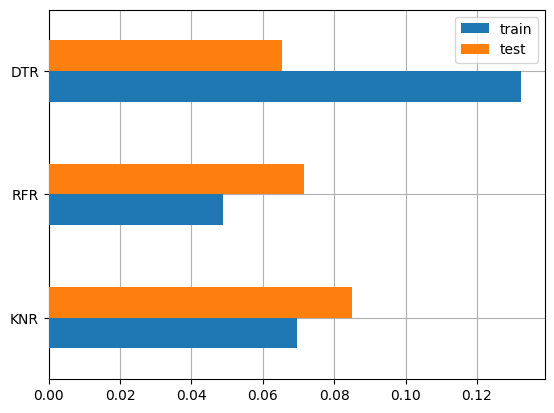

In [49]:
fig, ax = plt.subplots()
rmse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

**Uji model dengan data test**

In [50]:
prediksi = X_test.iloc[:1].copy()
pred_dict = {'y_true':y_test[:1]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)

pd.DataFrame(pred_dict)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but HistGradientBoostingRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(


,y_true,prediksi_DTR,prediksi_RFR,prediksi_KNR
204,4.43,4.2,4.3,3.7


Pada pengujian kali ini didapatkan hasil prediksi yang mendekati nilai sesungguhnya diperoleh oleh model KNR.